# Primer Análisis

In [ ]:
import pandas as pd

# Ruta del archivo
file_path = "/content/dataset_combinado.csv"  # Reemplaza con tu archivo

# Leer el archivo usando espacios como delimitador y saltar la primera fila
data = pd.read_csv(file_path, sep=r',', skiprows=0, engine='python', header=0)


# Mostrar las primeras filas del DataFrame limpio
print("Primeras filas de los datos procesados:")
print(data.head())

Primeras filas de los datos procesados:
           Fecha (GMT)  AlturaSignif.delOleaje(m)  PeriodoMedio(s)  \
0  2019-12-09 00:00:00                        NaN              NaN   
1  2019-12-09 01:00:00                        NaN              NaN   
2  2019-12-09 02:00:00                        NaN              NaN   
3  2019-12-09 03:00:00                        NaN              NaN   
4  2019-12-09 04:00:00                        NaN              NaN   

   Periodo_Pico  Direccion_Procedencia  Mardefondo1:Alturasignif.Espectral(m)  \
0           NaN                    NaN                                    NaN   
1           NaN                    NaN                                    NaN   
2           NaN                    NaN                                    NaN   
3           NaN                    NaN                                    NaN   
4           NaN                    NaN                                    NaN   

   Velocidad media de Corriente(m/s)  \
0           

MEDIDAS DE DISPERSION

In [ ]:
import pandas as pd

# Función para calcular medidas de dispersión
def calcular_dispersion(archivo, columna):
    # Cargar datos
    df = pd.read_csv(archivo)

    # Verificar si la columna existe
    if columna not in df.columns:
        print(f"⚠️ La columna '{columna}' no se encuentra en el archivo.")
        return

    # Obtener datos de la columna
    datos = df[columna].dropna()  # Eliminar valores nulos si los hay

    # Calcular medidas de dispersión
    rango = datos.max() - datos.min()
    varianza = datos.var()
    desviacion_estandar = datos.std()
    coef_var = (desviacion_estandar / datos.mean()) * 100  # Expresado en %
    max= datos.max()
    min = datos.min()

    # Mostrar resultados
    print(f"📊 Medidas de dispersión para '{columna}':")
    print(f"🔹 Rango: {rango}")
    print(f"🔹 Varianza: {varianza}")
    print(f"🔹 Desviación estándar: {desviacion_estandar}")
    print(f"🔹 Coeficiente de variación: {coef_var:.2f}%")
    print(f"🔹 Ola más alta registrada: {max}m")
    print(f"🔹 Ola más pequeña registrada: {min}m")

# 📌 Ejemplo de uso
archivo_csv = "/content/dataset_combinado.csv"  # Cambia esto por el nombre de tu archivo
columna_interes = "AlturaSignif.delOleaje(m)"  # Cambia esto por la variable que quieras analizar

calcular_dispersion(archivo_csv, columna_interes)


📊 Medidas de dispersión para 'AlturaSignif.delOleaje(m)':
🔹 Media: 0.8482388128379157
🔹 Rango: 5.08
🔹 Varianza: 0.35343205137869943
🔹 Desviación estándar: 0.5945015150348226
🔹 Coeficiente de variación: 70.09%
🔹 Ola más alta registrada: 5.14m
🔹 Ola más pequeña registrada: 0.06m


MEDIDAS DE TENDENCIA CENTRAL

In [ ]:
import pandas as pd
from scipy import stats

# Función para calcular medidas de tendencia central
def calcular_tendencia_central(archivo, columna):
    # Cargar datos
    df = pd.read_csv(archivo)

    # Verificar si la columna existe
    if columna not in df.columns:
        print(f"⚠️ La columna '{columna}' no se encuentra en el archivo.")
        return

    # Obtener datos de la columna (eliminar valores nulos)
    datos = df[columna].dropna()

    # Calcular medidas de tendencia central
    media = datos.mean()
    mediana = datos.median()
    moda = stats.mode(datos, keepdims=True)[0][0]  # Obtener la moda correctamente

    # Mostrar resultados
    print(f"📊 Medidas de tendencia central para '{columna}':")
    print(f"🔹 Media: {media:.2f}")
    print(f"🔹 Mediana: {mediana}")
    print(f"🔹 Moda: {moda}")

# 📌 Ejemplo de uso
archivo_csv = "/content/dataset_combinado.csv"  # Cambia esto por el nombre de tu archivo
columna_interes = "AlturaSignif.delOleaje(m)"  # Cambia esto por la variable que quieras analizar

calcular_tendencia_central(archivo_csv, columna_interes)


📊 Medidas de tendencia central para 'AlturaSignif.delOleaje(m)':
🔹 Media: 0.85
🔹 Mediana: 0.69
🔹 Moda: 0.57


FRECUENCIAS

In [ ]:
import pandas as pd

# Función para calcular frecuencias
def calcular_frecuencias(archivo, columna):
    df = pd.read_csv(archivo)

    # Verificar si la columna existe
    if columna not in df.columns:
        print(f"⚠️ La columna '{columna}' no se encuentra en el archivo.")
        return

    # Obtener valores de la columna
    datos = df[columna].dropna()

    # Calcular tabla de frecuencias
    frecuencia_absoluta = datos.value_counts().sort_index()
    frecuencia_relativa = frecuencia_absoluta / len(datos)
    frecuencia_acumulada = frecuencia_absoluta.cumsum()
    frecuencia_relativa_acumulada = frecuencia_relativa.cumsum()

    # Crear DataFrame con resultados
    tabla_frecuencias = pd.DataFrame({
        "Valor": frecuencia_absoluta.index,
        "Frecuencia Absoluta": frecuencia_absoluta.values,
        "Frecuencia Relativa": frecuencia_relativa.values,
        "Frecuencia Acumulada": frecuencia_acumulada.values,
        "Frecuencia Relativa Acumulada": frecuencia_relativa_acumulada.values
    })

    # Mostrar tabla en Colab
    from IPython.display import display
    display(tabla_frecuencias)

# 📌 Ejemplo de uso en Google Colab
archivo_csv = "/content/dataset_combinado.csv"  # Cambia esto por el nombre de tu archivo
columna_interes = "AlturaSignif.delOleaje(m)"  # Cambia esto por la variable que quieras analizar

calcular_frecuencias(archivo_csv, columna_interes)



,Valor,Frecuencia Absoluta,Frecuencia Relativa,Frecuencia Acumulada,Frecuencia Relativa Acumulada
0,0.06,1,0.000023,1,0.000023
1,0.07,7,0.000161,8,0.000184
2,0.08,15,0.000345,23,0.000529
3,0.09,21,0.000483,44,0.001012
4,0.10,31,0.000713,75,0.001726
...,...,...,...,...,...
433,5.00,1,0.000023,43458,0.999839
434,5.09,1,0.000023,43459,0.999862
435,5.10,1,0.000023,43460,0.999885
436,5.13,4,0.000092,43464,0.999977


from matplotlib import pyplot as plt
_df_0['Valor'].plot(kind='hist', bins=20, title='Valor')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Frecuencia Absoluta'].plot(kind='hist', bins=20, title='Frecuencia Absoluta')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Frecuencia Relativa'].plot(kind='hist', bins=20, title='Frecuencia Relativa')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Frecuencia Acumulada'].plot(kind='hist', bins=20, title='Frecuencia Acumulada')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Valor', y='Frecuencia Absoluta', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='Frecuencia Absoluta', y='Frecuencia Relativa', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Frecuencia Relativa', y='Frecuencia Acumulada', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='Frecuencia Acumulada', y='Frecuencia Relativa Acumulada', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Valor']
  ys = series['Frecuencia Absoluta']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('Valor', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Valor')
_ = plt.ylabel('Frecuencia Absoluta')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Valor']
  ys = series['Frecuencia Relativa']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('Valor', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Valor')
_ = plt.ylabel('Frecuencia Relativa')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Valor']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Valor'}, axis=1)
              .sort_values('Valor', ascending=True))
  xs = counted['Valor']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('Valor', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Valor')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Frecuencia Acumulada']
  ys = series['Frecuencia Absoluta']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('Frecuencia Acumulada', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Frecuencia Acumulada')
_ = plt.ylabel('Frecuencia Absoluta')

from matplotlib import pyplot as plt
_df_12['Valor'].plot(kind='line', figsize=(8, 4), title='Valor')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['Frecuencia Absoluta'].plot(kind='line', figsize=(8, 4), title='Frecuencia Absoluta')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['Frecuencia Relativa'].plot(kind='line', figsize=(8, 4), title='Frecuencia Relativa')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['Frecuencia Acumulada'].plot(kind='line', figsize=(8, 4), title='Frecuencia Acumulada')
plt.gca().spines[['top', 'right']].set_visible(False)

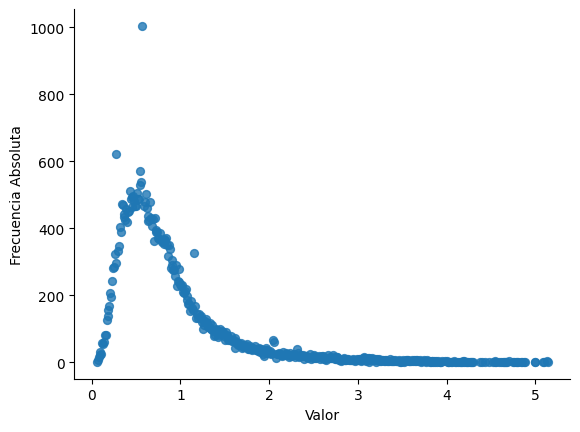

In [ ]:
from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Valor', y='Frecuencia Absoluta', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

# OUTLIERS

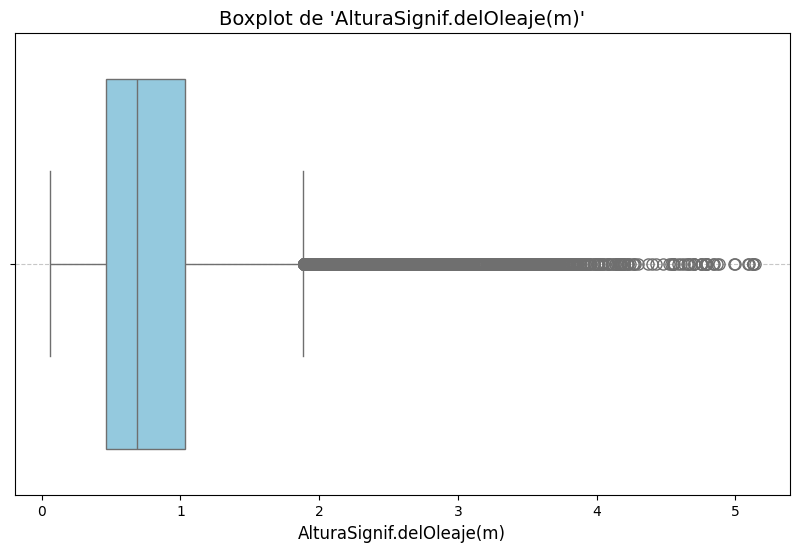

📊 Outliers detectados en 'AlturaSignif.delOleaje(m)':
🔹 Método IQR (Rango Intercuartílico): 2685 outliers
🔹 Método Desviación Estándar: 975 outliers


,Valor
0,1.98
1,2.27
2,2.09
3,2.16
4,2.28
...,...
253,2.64
254,3.39
255,3.14
256,3.64


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Función para identificar outliers
def detectar_outliers(archivo, columna):
    df = pd.read_csv(archivo)

    # Verificar si la columna existe
    if columna not in df.columns:
        print(f"⚠️ La columna '{columna}' no se encuentra en el archivo.")
        return

    # Obtener datos de la columna
    datos = df[columna].dropna()

    ### MÉTODO 1: RANGO INTERCUARTÍLICO (IQR)
    Q1 = datos.quantile(0.25)  # Primer cuartil
    Q3 = datos.quantile(0.75)  # Tercer cuartil
    IQR = Q3 - Q1  # Rango intercuartílico
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    outliers_iqr = datos[(datos < limite_inferior) | (datos > limite_superior)]

    ### MÉTODO 2: DESVIACIÓN ESTÁNDAR
    media = datos.mean()
    std = datos.std()
    limite_inf_std = media - 3 * std
    limite_sup_std = media + 3 * std

    outliers_std = datos[(datos < limite_inf_std) | (datos > limite_sup_std)]

    ### BOXPLOT

    # Obtener datos de la columna (eliminar valores nulos)
    datos = df[columna].dropna()

    # Crear Boxplot
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=datos, color="skyblue", fliersize=8)
    plt.title(f"Boxplot de '{columna}'", fontsize=14)
    plt.xlabel(columna, fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Mostrar gráfico
    plt.show()

    # Mostrar resultados
    print(f"📊 Outliers detectados en '{columna}':")
    print(f"🔹 Método IQR (Rango Intercuartílico): {len(outliers_iqr)} outliers")
    print(f"🔹 Método Desviación Estándar: {len(outliers_std)} outliers")

    # Mostrar tabla de outliers detectados
    outliers_df = pd.DataFrame({
        "Valor": list(set(outliers_iqr) | set(outliers_std))  # Unir ambos métodos
    })

    # Mostrar tabla en Colab
    from IPython.display import display
    display(outliers_df)

# 📌 Ejemplo de uso en Google Colab
archivo_csv = "/content/dataset_combinado.csv"  # Cambia esto por el nombre de tu archivo
columna_interes = "AlturaSignif.delOleaje(m)"  # Cambia esto por la variable que quieras analizar

detectar_outliers(archivo_csv, columna_interes)


# GRAFICOS DESCRIPTIVOS

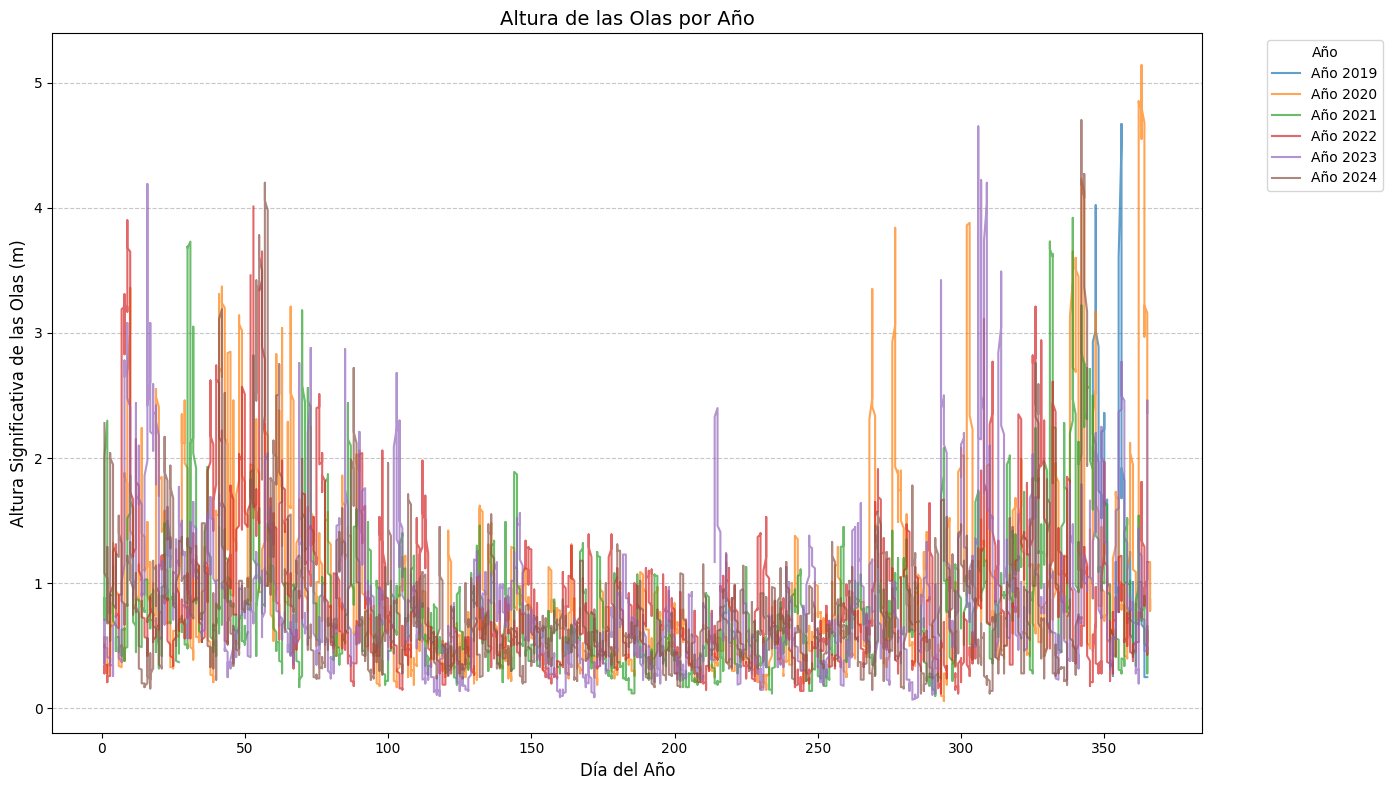

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Función para graficar la altura de las olas por año
def graficar_por_anio(archivo, columna_altura, columna_fecha):
    # Cargar datos
    df = pd.read_csv(archivo)

    # Verificar si las columnas existen
    if columna_altura not in df.columns or columna_fecha not in df.columns:
        print(f"⚠️ Las columnas '{columna_altura}' o '{columna_fecha}' no se encuentran en el archivo.")
        return

    # Convertir la columna de fechas a tipo datetime
    df[columna_fecha] = pd.to_datetime(df[columna_fecha])

    # Crear una columna para el año y el día del año
    df['Año'] = df[columna_fecha].dt.year
    df['Día del Año'] = df[columna_fecha].dt.dayofyear

    # Graficar los datos por año
    plt.figure(figsize=(14, 8))
    for año, datos_anuales in df.groupby('Año'):
        plt.plot(datos_anuales['Día del Año'], datos_anuales[columna_altura], label=f'Año {año}', alpha=0.7)

    # Personalizar gráfico
    plt.title('Altura de las Olas por Año', fontsize=14)
    plt.xlabel('Día del Año', fontsize=12)
    plt.ylabel('Altura Significativa de las Olas (m)', fontsize=12)
    plt.legend(title='Año', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()

    # Mostrar gráfico
    plt.show()

# 📌 Ejemplo de uso
archivo_csv = "/content/dataset_combinado.csv"  # Cambia esto por el nombre de tu archivo
columna_altura = "AlturaSignif.delOleaje(m)"  # Cambia esto por la columna de altura
columna_fecha = "Fecha (GMT)"  # Cambia esto por el nombre de la columna de fechas

graficar_por_anio(archivo_csv, columna_altura, columna_fecha)



BOXPLOT MENSUAL

<ipython-input-8-cc78dae70171>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Mes', y=columna_altura, data=df, palette='Blues')


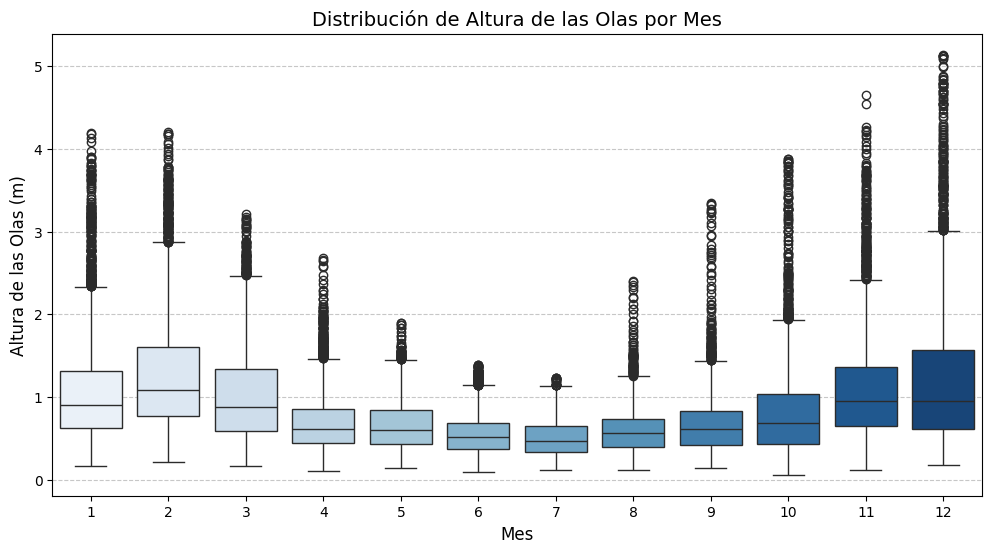

In [ ]:
def boxplot_por_mes(archivo, columna_altura, columna_fecha):
    df = pd.read_csv(archivo)
    df[columna_fecha] = pd.to_datetime(df[columna_fecha])
    df['Mes'] = df[columna_fecha].dt.month

    # Crear boxplot
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Mes', y=columna_altura, data=df, palette='Blues')
    plt.title('Distribución de Altura de las Olas por Mes', fontsize=14)
    plt.xlabel('Mes', fontsize=12)
    plt.ylabel('Altura de las Olas (m)', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# Uso del boxplot
boxplot_por_mes(archivo_csv, columna_altura, columna_fecha)


ALTURA VS VELOCIDAD DEL VIENTO

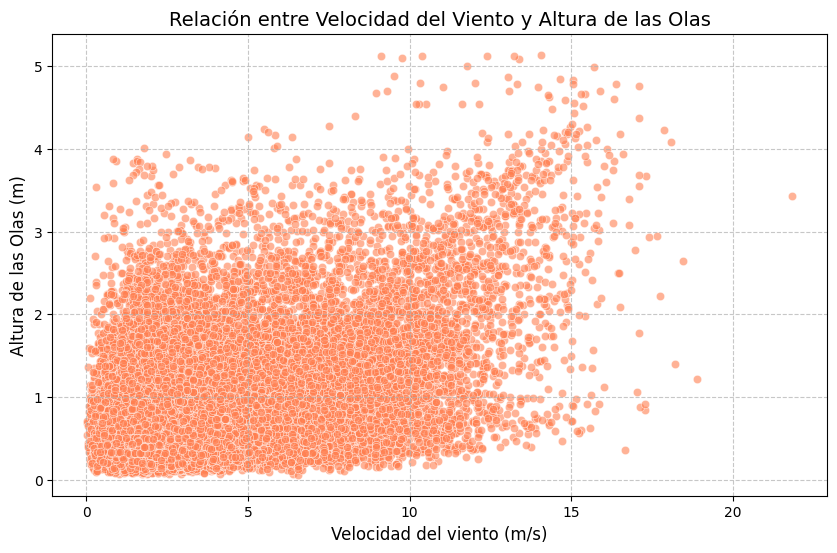

In [ ]:
def scatter_altura_viento(archivo, columna_altura, columna_viento):
    df = pd.read_csv(archivo)

    # Crear scatterplot
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=columna_viento, y=columna_altura, data=df, alpha=0.6, color="coral")
    plt.title('Relación entre Velocidad del Viento y Altura de las Olas', fontsize=14)
    plt.xlabel('Velocidad del viento (m/s)', fontsize=12)
    plt.ylabel('Altura de las Olas (m)', fontsize=12)
    plt.grid(axis='both', linestyle='--', alpha=0.7)
    plt.show()

# Uso del scatterplot
scatter_altura_viento(archivo_csv, columna_altura, 'Velocidad del viento(m/s)')


VELOCIDAD CORRIENTE VS ALTURA DE LAS OLAS

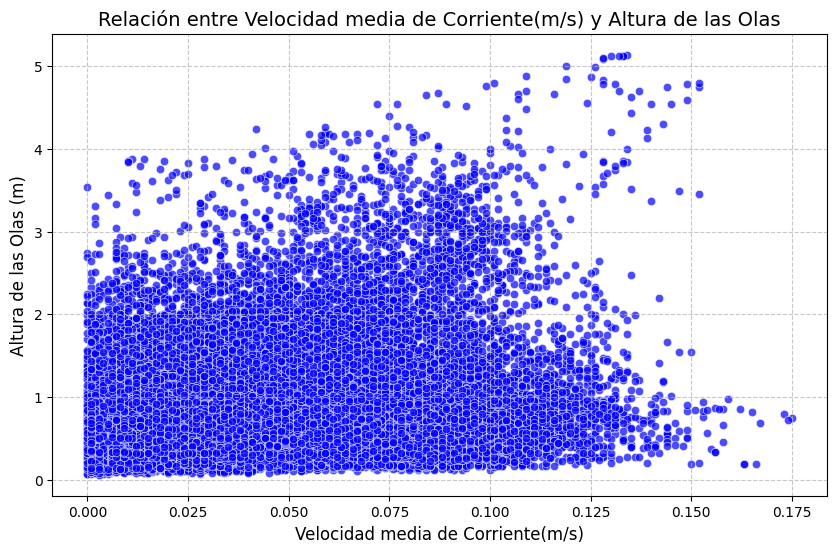

In [ ]:
def scatter_altura_vs_variable(archivo, columna_altura, columna_variable):
    df = pd.read_csv(archivo)

    # Crear scatterplot
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=columna_variable, y=columna_altura, data=df, alpha=0.7, color="blue")
    plt.title(f'Relación entre {columna_variable} y Altura de las Olas', fontsize=14)
    plt.xlabel(columna_variable, fontsize=12)
    plt.ylabel('Altura de las Olas (m)', fontsize=12)
    plt.grid(axis='both', linestyle='--', alpha=0.7)
    plt.show()

# Uso del scatterplot
scatter_altura_vs_variable(archivo_csv, "AlturaSignif.delOleaje(m)", "Velocidad media de Corriente(m/s)")


HEATMAP

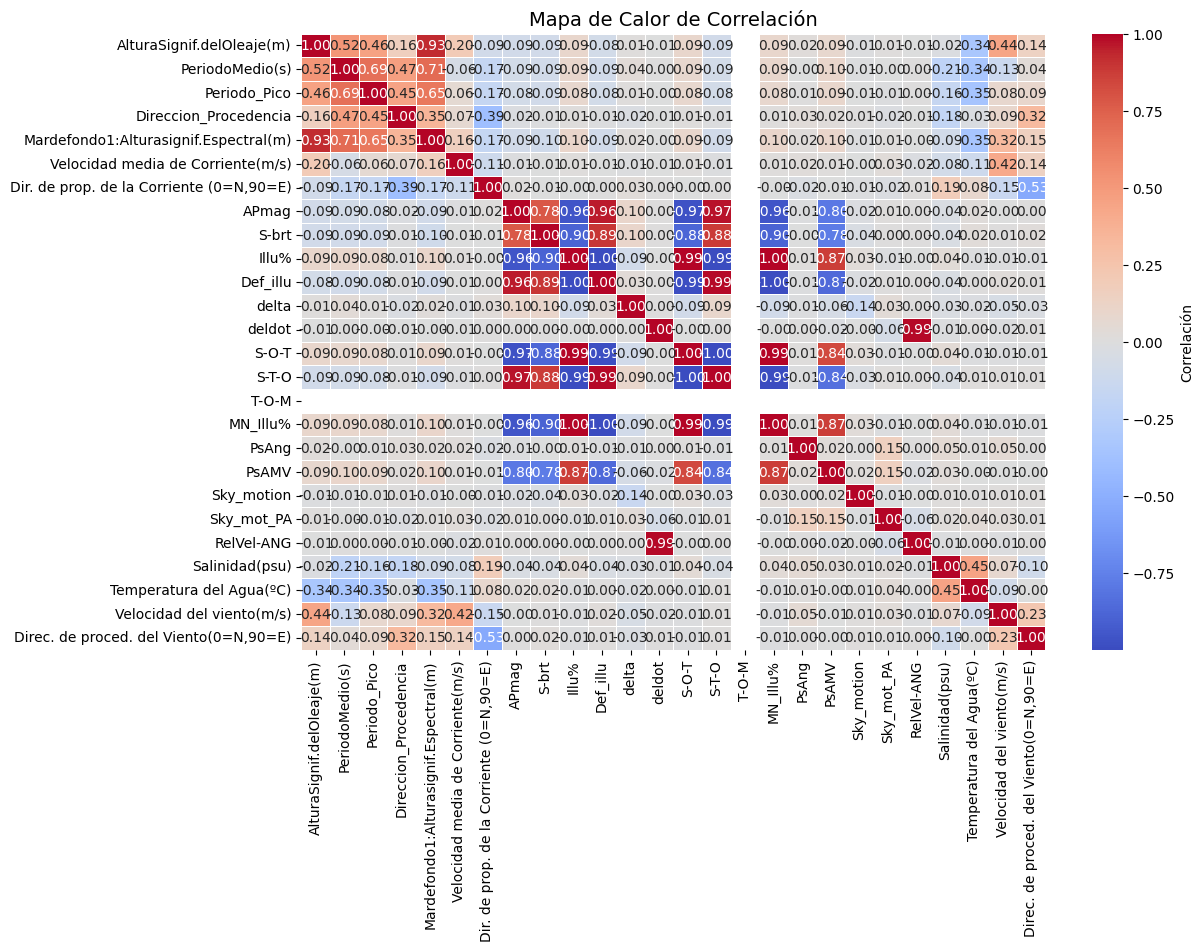

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def heatmap_correlacion(archivo):
    df = pd.read_csv(archivo)

    # Convertir la columna de fechas a datetime si está presente
    if 'Fecha' in df.columns:
        df['Fecha'] = pd.to_datetime(df['Fecha'])  # Convierte a formato datetime

    # Seleccionar solo columnas numéricas para calcular la correlación
    df_numerico = df.select_dtypes(include=['number'])

    # Calcular la matriz de correlación
    correlacion = df_numerico.corr()

    # Crear heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlacion, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, cbar_kws={'label': 'Correlación'})
    plt.title('Mapa de Calor de Correlación', fontsize=14)
    plt.show()

# Uso del heatmap corregido
archivo_csv = "/content/dataset_combinado.csv"  # Cambia esto por el nombre real de tu archivo
heatmap_correlacion(archivo_csv)



In [ ]:
import pandas as pd

# Función para identificar el tipo de dato de cada columna
def identificar_tipos_datos(archivo):
    # Cargar el DataFrame dentro de la función
    df = pd.read_csv(archivo)

    # Crear DataFrame con los tipos de datos
    df_tipos = pd.DataFrame(df.dtypes, columns=["Tipo de Dato"]).reset_index()
    df_tipos.columns = ["Variable", "Tipo de Dato"]

    # Mostrar la tabla correctamente
    from IPython.display import display
    display(df_tipos)

# 📌 Uso del código corregido
archivo_csv = "/content/dataset_combinado.csv"  # Asegúrate de que este archivo exista en tu entorno
identificar_tipos_datos(archivo_csv)


,Variable,Tipo de Dato
0,Fecha (GMT),object
1,AlturaSignif.delOleaje(m),float64
2,PeriodoMedio(s),float64
3,Periodo_Pico,float64
4,Direccion_Procedencia,float64
5,Mardefondo1:Alturasignif.Espectral(m),float64
6,Velocidad media de Corriente(m/s),float64
7,"Dir. de prop. de la Corriente (0=N,90=E)",float64
8,SOLAR PRESENCE,object
9,LUNAR PRESENCE,object


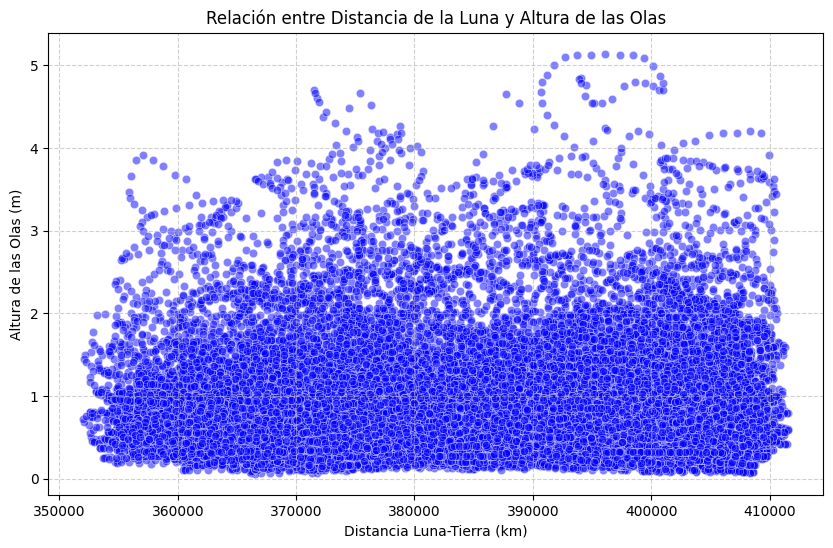

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def scatter_distancia_vs_olas(archivo, columna_distancia, columna_altura):
    df = pd.read_csv(archivo)

    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=df[columna_distancia], y=df[columna_altura], alpha=0.5, color="blue")
    plt.title('Relación entre Distancia de la Luna y Altura de las Olas')
    plt.xlabel('Distancia Luna-Tierra (km)')
    plt.ylabel('Altura de las Olas (m)')
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.show()

# 📌 Uso del código
scatter_distancia_vs_olas("/content/dataset_combinado.csv", "delta", "AlturaSignif.delOleaje(m)")



Altura promedio de las olas por fase lunar:
           Fase Lunar  AlturaSignif.delOleaje(m)
0        🌑 Luna Nueva                   0.796801
1         🌒 Creciente                   0.789542
2  🌓 Cuarto Creciente                   0.904862
3  🌔 Gibosa Creciente                   0.886999
4        🌕 Luna Llena                   0.917868


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127761 (\N{NEW MOON SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127762 (\N{WAXING CRESCENT MOON SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127763 (\N{FIRST QUARTER MOON SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127764 (\N{WAXING GIBBOUS MOON SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127765 (\N{FULL MOON SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(by

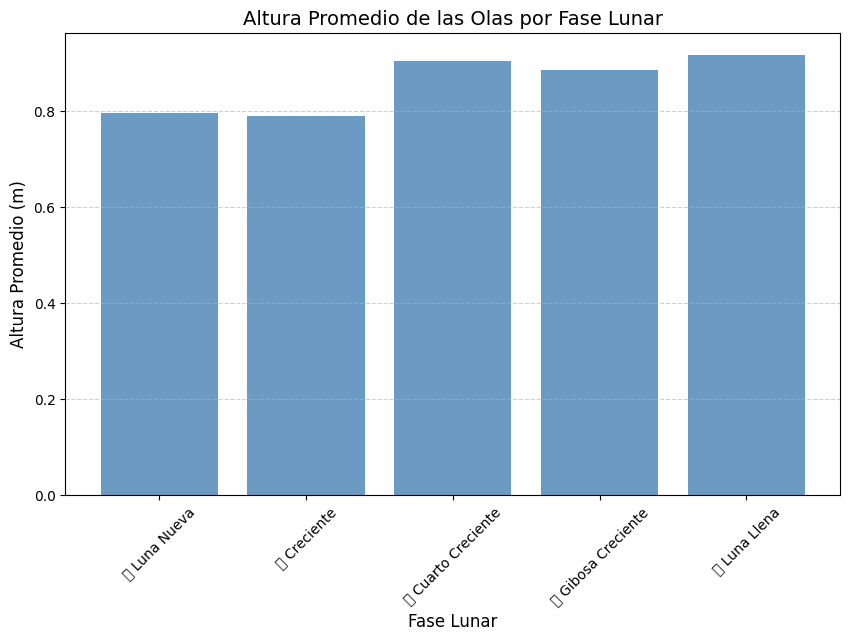

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Función mejorada para clasificar la fase lunar
def obtener_fase_lunar(illu):
    if pd.isna(illu):
        return "Desconocida"
    elif 0 <= illu <= 5:
        return "🌑 Luna Nueva"
    elif 5 < illu < 45:
        return "🌒 Creciente"
    elif 45 <= illu <= 55:
        return "🌓 Cuarto Creciente"
    elif 55 < illu < 95:
        return "🌔 Gibosa Creciente"
    elif 95 <= illu <= 100:
        return "🌕 Luna Llena"
    elif 55 < illu < 95:
        return "🌖 Gibosa Menguante"
    elif 45 <= illu <= 55:
        return "🌗 Cuarto Menguante"
    elif 5 < illu < 45:
        return "🌘 Menguante"
    else:
        return "Desconocida"

# Función para calcular la altura promedio de las olas por fase lunar
def calcular_altura_promedio(archivo, columna_illu, columna_altura):
    df = pd.read_csv(archivo)

    # Asegurar que Illu% sea numérico
    df[columna_illu] = pd.to_numeric(df[columna_illu], errors='coerce')

    # Aplicar la función para asignar la fase lunar
    df["Fase Lunar"] = df[columna_illu].apply(obtener_fase_lunar)

    # Filtrar valores desconocidos
    df = df[df["Fase Lunar"] != "Desconocida"]

    # Calcular el promedio de altura de las olas por fase lunar
    promedio_por_fase = df.groupby("Fase Lunar")[columna_altura].mean().reset_index()

    # Orden correcto de las fases lunares
    orden_fases = [
        "🌑 Luna Nueva", "🌒 Creciente", "🌓 Cuarto Creciente",
        "🌔 Gibosa Creciente", "🌕 Luna Llena", "🌖 Gibosa Menguante",
        "🌗 Cuarto Menguante", "🌘 Menguante"
    ]
    promedio_por_fase["Fase Lunar"] = pd.Categorical(promedio_por_fase["Fase Lunar"], categories=orden_fases, ordered=True)
    promedio_por_fase = promedio_por_fase.sort_values("Fase Lunar")

    # Mostrar resultados corregidos
    print("\nAltura promedio de las olas por fase lunar:")
    print(promedio_por_fase)

    # Graficar los resultados
    plt.figure(figsize=(10, 6))
    plt.bar(promedio_por_fase["Fase Lunar"], promedio_por_fase[columna_altura], color='steelblue', alpha=0.8)
    plt.title('Altura Promedio de las Olas por Fase Lunar', fontsize=14)
    plt.xlabel('Fase Lunar', fontsize=12)
    plt.ylabel('Altura Promedio (m)', fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle="--", alpha=0.6)
    plt.show()

# 📌 Uso del código corregido
archivo_csv = "/content/dataset_combinado.csv"  # Asegúrate de colocar el nombre correcto del archivo
calcular_altura_promedio(archivo_csv, "Illu%", "AlturaSignif.delOleaje(m)")
